 # OCR project with (ANN + CNN) Algorthim 

In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers
from keras.layers import *
from keras.utils import np_utils

In [3]:
train_df = pd.read_csv('emnist-balanced-train.csv',header=None)
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,112800.00000,112800.0,112800.0,112800.0,112800.0,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,...,112800.000000,112800.0,112800.0,112800.000000,112800.000000,112800.0,112800.0,112800.0,112800.0,112800.0
mean,23.00000,0.0,0.0,0.0,0.0,0.001365,0.011560,0.020700,0.017438,0.018475,...,0.000310,0.0,0.0,0.002163,0.000284,0.0,0.0,0.0,0.0,0.0
std,13.56472,0.0,0.0,0.0,0.0,0.235046,1.221826,1.658797,1.602478,1.719549,...,0.104211,0.0,0.0,0.726499,0.095279,0.0,0.0,0.0,0.0,0.0
min,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,11.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,23.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,35.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,46.00000,0.0,0.0,0.0,0.0,63.000000,192.000000,217.000000,217.000000,217.000000,...,35.000000,0.0,0.0,244.000000,32.000000,0.0,0.0,0.0,0.0,0.0


- Each column after represents one pixel value (784 total for a 28 x 28 image) 

In [5]:
train_df.shape

(112800, 785)

- We have 112800 rows (images), each described using 784 variables 28X28 pixels plus one column as output variable (the first column)

-------------------------------------------------------------------------------------------------------------------------------------

- Creating label dictionary The output variables' values comprise of 0 to 46 values where 0-9 stands for 0-9 numbers, 10-35 stands for uppercase A-Z and 35+ stand for lowercase alphabets. We will thus create a dictionary which will have these as key and value pairs.



In [6]:
label_map = pd.read_csv("emnist-balanced-mapping.txt", delimiter = ' ', index_col=0, header=None, squeeze=True)
label_map.head()

C:\Users\Karim Ashraf\AppData\Local\Temp\ipykernel_6556\409051872.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  label_map = pd.read_csv("emnist-balanced-mapping.txt", delimiter = ' ', index_col=0, header=None, squeeze=True)


0
0    48
1    49
2    50
3    51
4    52
Name: 1, dtype: int64

- In our dataset, there is a file emnist-balanced-mapping which contains the characters and their ASCII equivalents. We can have the index column as the key of the dictionary and the value ASCII code converted to char as the value of the dictionary.

In [7]:
#Running a loop for ASCII equivalent to character conversion -->
label_dictionary = {}
for index, label in enumerate(label_map):
    label_dictionary[index] = chr(label)

label_dictionary

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In [8]:
train_df_new = train_df[train_df[0].isin(np.arange(0, 36))]
train_df_new

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112795,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112796,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112797,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112798,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train_df_new[0].describe()

count    86400.000000
mean        17.500000
std         10.388355
min          0.000000
25%          8.750000
50%         17.500000
75%         26.250000
max         35.000000
Name: 0, dtype: float64

In [10]:
# Resetting Index -->
train_df_new.reset_index(inplace=True)
train_df_new

,index,0,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,3,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,26,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,32,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86395,112795,22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86396,112796,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86397,112797,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86398,112798,31,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
x_train = train_df_new.loc[:, 1:]
y_train = train_df_new.loc[:, 0]

x_train.shape, y_train.shape

((86400, 784), (86400,))

# Visualising Sample data

In [57]:
sample_image = x_train.iloc[18] #input number for any loc you want  for exmaple=[28,30,18,22,55.....] 
sample_label = y_train.iloc[18] 
sample_image.shape, sample_label

((784,), 29)

Label entry  is :  T


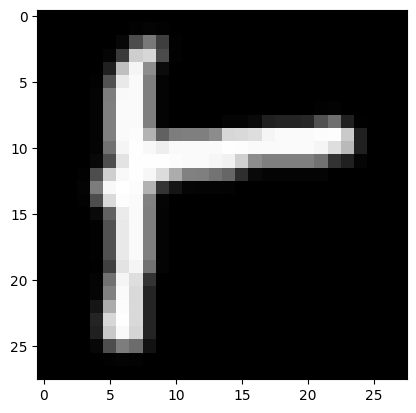

In [58]:
print("Label entry  is : ", label_dictionary[sample_label])
plt.imshow(sample_image.values.reshape(28, 28), cmap=plt.cm.gray)
plt.show()

- we make fun flip & rotate that change position 90 degree that can show the image in simple way

Label entry is :  T


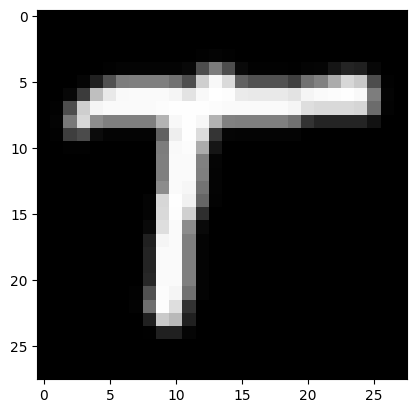

In [59]:
def flip_and_rotate(image):
    image = image.reshape(28, 28)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image
print("Label entry is : ", label_dictionary[sample_label])
plt.imshow(flip_and_rotate(sample_image.values), cmap=plt.cm.gray)
plt.show()

In [15]:
x_train = np.apply_along_axis(flip_and_rotate, 1, x_train.values)
x_train.shape

(86400, 28, 28)

 - we want to apply reshape & rotate to all images in X_train

# Normalizing the Data

In [16]:
#Data Scaling to bring the input values between 0 to 1
x_train = x_train.astype('float32')/255
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.03529412, 0.1254902 ,
        0.01176471, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.1333

 - we must perform one hot encoding so as to get a number of output columns comprised of 0 and 1 class labels.

In [17]:
number_of_classes = y_train.nunique()
number_of_classes

36

In [18]:
#Converts a class vector (integers) to binary class matrix that help us to do encoding  of numpy array
y_train = np_utils.to_categorical(y_train,number_of_classes)
y_train.shape

(86400, 36)

- tensorflow requires 4D Array, (batch 32 width 28 height 28 channel) and our x_train is 3D array (no. of images 28 width 28 height), we will be adding one more dimension to the x_train

In [19]:
x_train.shape

(86400, 28, 28)

In [20]:
x_train = x_train.reshape(-1,28,28, 1)
x_train.shape

(86400, 28, 28, 1)

 # Train and Validation Split

In [25]:
# split 20% Validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size= 0.20, random_state=88)

# Building (ANN + CNN) model

In [26]:
model = Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(number_of_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 48)        38448     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_3 (Dense)             (None, 256)              

- we use 2 fun that help  model to improve accuracy  & check if value loss decrease that help model to predict correct & reach to the best fit and save him in model

In [27]:
optimizer_name = 'adam'

model.compile(loss='categorical_crossentropy', optimizer=optimizer_name, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=7, verbose=1, mode='min')
mcp_save = ModelCheckpoint('my_model.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='auto')

history = model.fit(x_train,y_train,epochs=15,batch_size=32,verbose=1,  validation_split=0.20, callbacks=[early_stopping, mcp_save])

Epoch 1/15
1295/1296 [============================>.] - ETA: 0s - loss: 0.6729 - accuracy: 0.7842
Epoch 1: val_loss improved from inf to 0.37787, saving model to my_model.h5
1296/1296 [==============================] - 46s 34ms/step - loss: 0.6726 - accuracy: 0.7842 - val_loss: 0.3779 - val_accuracy: 0.8695
Epoch 2/15
1295/1296 [============================>.] - ETA: 0s - loss: 0.3210 - accuracy: 0.8824
Epoch 2: val_loss improved from 0.37787 to 0.33407, saving model to my_model.h5
1296/1296 [==============================] - 45s 35ms/step - loss: 0.3211 - accuracy: 0.8823 - val_loss: 0.3341 - val_accuracy: 0.8822
Epoch 3/15
1296/1296 [==============================] - ETA: 0s - loss: 0.2578 - accuracy: 0.9030
Epoch 3: val_loss improved from 0.33407 to 0.30085, saving model to my_model.h5
1296/1296 [==============================] - 45s 35ms/step - loss: 0.2578 - accuracy: 0.9030 - val_loss: 0.3009 - val_accuracy: 0.8910
Epoch 4/15
1295/1296 [============================>.] - ETA: 0s -

- show the improvment of accuracy in plots

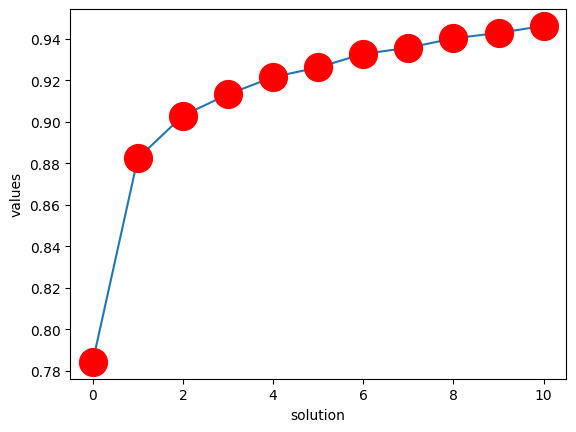

In [28]:
newlist=[]
x=history.history['accuracy']
y=history.history['val_accuracy']
ypoints = np.array(x)
xpoints=np.array(y)# naming the x axis
plt.xlabel('solution')# naming the y axis
plt.ylabel('values')
plt.plot(ypoints, marker='o', ms=20, mec='r', mfc='r')
plt.show()

In [29]:
model = load_model('my_model.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 48)        38448     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_3 (Dense)             (None, 256)              

# Prediction on the Validation Data

In [30]:
y_pred = model.predict(x_val)
y_pred.shape

405/405 [==============================] - 4s 9ms/step


(12960, 36)

Validation Accuracy

In [31]:
val_acc = model.evaluate(x_val, y_val)
print('Loss value is ',val_acc[0])
print('Accuracy value is ',val_acc[1])

405/405 [==============================] - 4s 9ms/step - loss: 0.2750 - accuracy: 0.9008
Loss value is  0.2749811112880707
Accuracy value is  0.9008487462997437


In [39]:
test_df = pd.read_csv('emnist-balanced-test.csv', header=None)
test_df.shape

(18800, 785)

In [40]:
test_df_new = test_df[test_df[0].isin(np.arange(10, 36))]
test_df_new.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,10400.000000,10400.0,10400.0,10400.0,10400.0,10400.000000,10400.000000,10400.000000,10400.000000,10400.000000,...,10400.0,10400.0,10400.0,10400.0,10400.0,10400.0,10400.0,10400.0,10400.0,10400.0
mean,22.500000,0.0,0.0,0.0,0.0,0.010962,0.035673,0.020385,0.016923,0.020385,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,7.500361,0.0,0.0,0.0,0.0,0.710989,2.368003,1.417666,1.199698,2.039981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,10.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,16.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,22.500000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,29.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,35.000000,0.0,0.0,0.0,0.0,63.000000,213.000000,108.000000,95.000000,208.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
x_test = test_df_new.loc[:, 1:]
y_test = test_df_new.loc[:, 0]
x_test.shape, y_test.shape

((10400, 784), (10400,))

In [42]:
x_test = np.apply_along_axis(flip_and_rotate, 1, x_test.values)
y_test = np_utils.to_categorical(y_test, number_of_classes)

x_test.shape, y_test.shape

((10400, 28, 28), (10400, 36))

In [43]:
#Normalisation
x_test = x_test.astype('float32') / 255


In [44]:
#Reshaping (Changing Dimension)
x_test = x_test.reshape(-1, 28, 28, 1)
x_test.shape

(10400, 28, 28, 1)

In [47]:
#Evaluating Model
test_acc = model.evaluate(x_test, y_test)
print('Loss value is ',test_acc[0])
print('Accuracy value is ',test_acc[1])

325/325 [==============================] - 3s 8ms/step - loss: 0.2607 - accuracy: 0.9104
Loss value is  0.2606888711452484
Accuracy value is  0.9103845953941345


In [48]:
#Prediction
y_pred_test = model.predict(x_test)
# Finding shape
y_pred_test.shape

325/325 [==============================] - 3s 10ms/step


(10400, 36)

# Visualising some predicted values

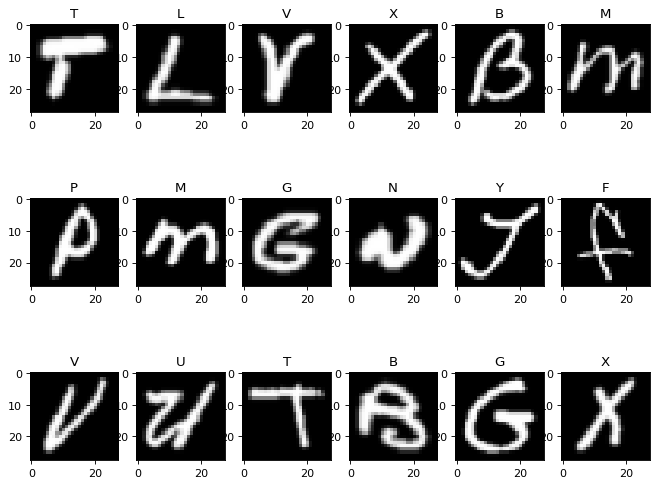

In [49]:
plt.figure(figsize=(10, 8), dpi=80)
for i in range(200, 218):
    plt.subplot(3,6,i-199)
    plt.imshow(x_test[i], cmap=plt.cm.gray)
    plt.title(label_dictionary[y_pred_test[i].argmax()])